### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피 쳐 : Weight, Length
- 타 겟 : Species
- 유 형 : 지도학습 + 분류

(1) 모듈 로딩 & 데이터 준비

In [1]:
import pandas as pd                                    # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier     # 기계 학습 관련 모듈
import matplotlib.pyplot as plt

In [2]:
data_file = '../data/fish.csv'

In [3]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [4]:
# Bream, Smelt 품종 행만 추출
twofishDF = fishDF[fishDF['Species'].isin(['Bream','Smelt'])]  # Boolean Indexing

# 해당 행만 도출
twofishDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [5]:
twofishDF.reset_index(drop = True, inplace=True)
twofishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(2) 데이터 전처리 <hr>
- 정제 : 결측치, 중복 데이터, 이상치 처리
- 정규화 : 피쳐 스케일링


In [6]:
# 표준 정규 분포 => 평균 0, 표준편차 1 => Z-score = (피쳐 - 평균) / 표준편차

# Weight 컬럼
twofishDF.Weight.mean(), twofishDF.Weight.std()
retW = (twofishDF.Weight - twofishDF.Weight.mean()) /twofishDF.Weight.std()
# twofishDF.loc[:,'Weight'] = retW

# Length 컬럼
twofishDF.Length.mean(), twofishDF.Length.std()
retL = (twofishDF.Length - twofishDF.Length.mean()) /twofishDF.Length.std()
# twofishDF.loc[:,'Length'] = retL

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0     Bream
1     Bream
2     Bream
3     Bream
4     Bream
5     Bream
6     Bream
7     Bream
8     Bream
9     Bream
10    Bream
11    Bream
12    Bream
13    Bream
14    Bream
15    Bream
16    Bream
17    Bream
18    Bream
19    Bream
20    Bream
21    Bream
22    Bream
23    Bream
24    Bream
25    Bream
26    Bream
27    Bream
28    Bream
29    Bream
30    Bream
31    Bream
32    Bream
33    Bream
34    Bream
35    Smelt
36    Smelt
37    Smelt
38    Smelt
39    Smelt
40    Smelt
41    Smelt
42    Smelt
43    Smelt
44    Smelt
45    Smelt
46    Smelt
47    Smelt
48    Smelt
Name: Species, dtype: object

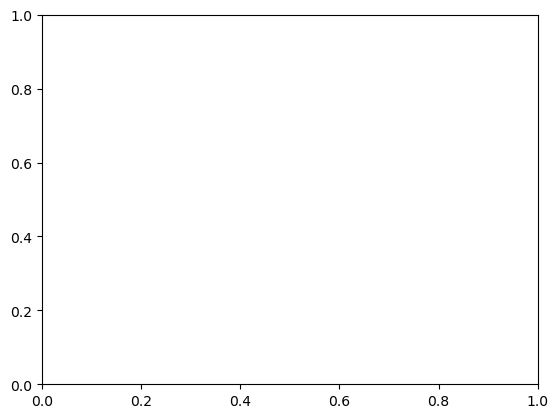

In [7]:
# Weight, Length로 품종 구별이 가능한지 시각화
plt.scatter(twofishDF['Weight'], twofishDF['Length'], c = twofishDF['Species'])
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(3) 기계학습 데이터셋 준비
- 피쳐와 타겟 분리
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋     : 80%
- 테스트용 데이터셋   : 20%

In [ ]:
# 피쳐/특성/속성 데이터 추출
featureDF = twofishDF[twofishDF.columns[1:]]
featureDF

In [ ]:
# 클래스/타겟/라벨 데이터 추출 ==> 수치화 즉 정수 인코딩
targetSR = twofishDF['Species']
targetSR = targetSR.replace({'Bream':0,'Smelt':1})
targetSR

(3-1) 학습/테스트 데이터셋 분리<hr>
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80 : 20

In [ ]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(featureDF,targetSR, test_size = 0.2, stratify=targetSR)

In [ ]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---> \n{x_train.shape},{y_train.shape}')
print(f'\n{y_train.value_counts()/y_train.shape[0]}')
print(f'테스트용 데이터셋 ---> \n{x_test.shape},{y_test.shape}')
print(f'\n{y_test.value_counts()/y_test.shape[0]}')

(3-2) 피쳐 데이터의 스케일링 <hr>
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용
1. 스케일러 인스턴스 생성
2. 데이터에 대한 평균, 표준편차 계산 진행 :fit() 메서드
3. 데이터에 대한 스케일링 진행 : transform() 메서드

In [ ]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [197]:
scaler = StandardScaler()

In [198]:
scaler.fit(x_train)

StandardScaler()

In [199]:
# test용에도 적용하기 위해 따로 저장해야함
scaler.mean_

array([434.11538462,  26.87948718])

In [200]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(39, 2)

In [201]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(10, 2)

(3-3) 시각화<hr>

In [202]:
# 모듈 로딩
import matplotlib.pyplot as plt

In [203]:
x_train

,Weight,Length
44,12.2,12.2
15,600.0,32.0
33,975.0,41.0
3,363.0,29.0
16,700.0,33.0
14,600.0,32.0
28,850.0,36.0
46,12.2,13.0
5,450.0,29.7
10,475.0,31.0


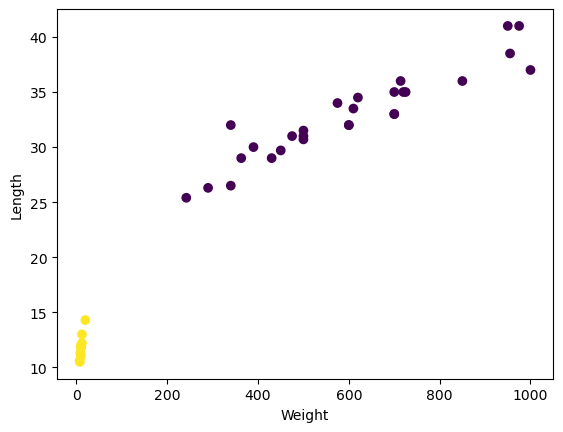

In [204]:
## 원본 데이터 시각화 ==> x_train
plt.scatter(x_train.Weight,x_train.Length, c = y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [205]:
scaled_x_train

array([[-1.31892913, -1.46373928],
       [ 0.51856382,  0.51058294],
       [ 1.69083305,  1.40800213],
       [-0.22231034,  0.21144321],
       [ 0.83116894,  0.61029618],
       [ 0.51856382,  0.51058294],
       [ 1.30007664,  0.90943592],
       [-1.31892913, -1.38396868],
       [ 0.04965612,  0.28124248],
       [ 0.1278074 ,  0.4108697 ],
       [-1.32987031, -1.5534812 ],
       [ 1.76898433,  1.00914916],
       [-0.13790695,  0.31115645],
       [-1.32643165, -1.48368193],
       [-0.29420952, -0.0378399 ],
       [-0.45051208, -0.05778255],
       [ 0.44041253,  0.71000943],
       [-1.32643165, -1.56345252],
       [ 0.90932023,  0.80972267],
       [ 0.54982433,  0.66015281],
       [ 0.87493366,  0.90943592],
       [ 1.62831202,  1.15871902],
       [-1.32580644, -1.50362458],
       [-1.32611905, -1.50362458],
       [ 0.20595869,  0.46072632],
       [-0.29420952,  0.51058294],
       [ 1.61268177,  1.40800213],
       [ 0.83116894,  0.61029618],
       [-1.29548375,

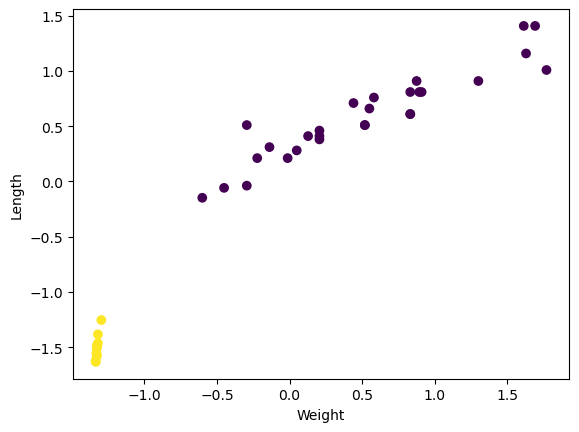

In [206]:
## 스케일된 데이터 시각화 => scaled_x_train
plt.scatter(scaled_x_train[:,0],scaled_x_train[:,1], c = y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(4) 학습 진행

In [216]:
## 방법(1) : KNN 알고리즘
fishModel1 = KNeighborsClassifier()

# 학습
fishModel1.fit(scaled_x_train,y_train)
fishModel1

KNeighborsClassifier()

In [208]:
## 방법(2) : SVC
from sklearn.svm import SVC

fishModel2 = SVC()

# 학습
fishModel2.fit(scaled_x_train,y_train)
fishModel2

SVC()

In [214]:
## 방법(3) : 
from sklearn.linear_model import LogisticRegression

fishModel3 = LogisticRegression()

# 학습
fishModel3.fit(scaled_x_train,y_train)
fishModel3

LogisticRegression()

(5) 테스트 진행

In [219]:
# 점수 가장 높게 나오는 모델을 선택
print('KNN',fishModel1.score(scaled_x_test,y_test))
print('SVC',fishModel2.score(scaled_x_test,y_test))
print('LogisticRegression',fishModel3.score(scaled_x_test,y_test))

KNN 1.0
SVC 1.0
LogisticRegression 1.0


(6) 예측<hr>

In [210]:
# 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160,25]], columns=twofishDF.columns[1:])
new_data

,Weight,Length
0,160,25


In [211]:
# 피쳐 스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [212]:
# 예측
y_pre = fishModel.predict(scaled_new_data)
if y_pre == 0:
    print('Bream')
elif y_pre == 1:
    print('Smelt')

Bream
